In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define the dimensions of the 3D cubic box
box_size = 10


In [3]:
# Define the properties of each cylindrical bottle
n_bottles = 20
bottle_lengths = np.random.uniform(1, 3, n_bottles)
bottle_radii = np.random.uniform(0.5, 1, n_bottles)
bottle_orientations = np.random.uniform(0, np.pi, n_bottles)


In [4]:
# Generate random positions and orientations for each bottle within the box
bottle_positions = np.random.uniform(0, box_size, (n_bottles, 3))
bottle_rotations = np.random.uniform(0, 2*np.pi, (n_bottles, 3))


In [5]:
# Check for bottle-bottle intersections and discard intersecting bottles
for i in range(n_bottles):
    for j in range(i+1, n_bottles):
        dx = bottle_positions[i, 0] - bottle_positions[j, 0]
        dy = bottle_positions[i, 1] - bottle_positions[j, 1]
        dz = bottle_positions[i, 2] - bottle_positions[j, 2]
        d = np.sqrt(dx*2 + dy*2 + dz*2)
        if d < bottle_radii[i] + bottle_radii[j]:
            bottle_positions[j] = np.random.uniform(0, box_size, 3)
            bottle_rotations[j] = np.random.uniform(0, 2*np.pi, 3)


<ipython-input-5-7932615b85c9>:7: RuntimeWarning: invalid value encountered in sqrt
  d = np.sqrt(dx*2 + dy*2 + dz*2)


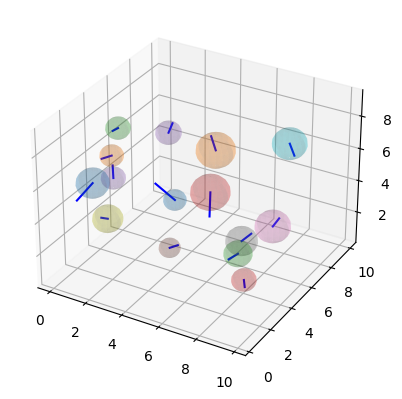

In [6]:
# Count the number of non-intersecting bottles and plot them in a 3D space
n_non_intersecting_bottles = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_bottles):
    x = bottle_positions[i, 0]
    y = bottle_positions[i, 1]
    z = bottle_positions[i, 2]
    l = bottle_lengths[i]
    r = bottle_radii[i]
    phi = bottle_orientations[i]
    theta = bottle_rotations[i, 0]
    psi = bottle_rotations[i, 1]
    cx = x + l/2*np.cos(theta)*np.sin(psi)
    cy = y + l/2*np.sin(theta)*np.sin(psi)
    cz = z + l/2*np.cos(psi)
    if cx-r > 0 and cx+r < box_size and cy-r > 0 and cy+r < box_size and cz-r > 0 and cz+r < box_size:
        n_non_intersecting_bottles += 1
        ax.plot([x, cx], [y, cy], [z, cz], 'b-')
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        ax.plot_surface(cx + r*np.sin(u)*np.cos(v), cy + r*np.sin(u)*np.sin(v), cz + r*np.cos(u), alpha=0.2)
plt.show()


In [7]:
print("Number of non-intersecting bottles:", n_non_intersecting_bottles)

Number of non-intersecting bottles: 15


In [8]:
# Count the number of non-intersecting bottles and print their information
n_non_intersecting_bottles = 0 #initializing a variable n_non_intersecting_bottles to keep track of the count of non-intersecting bottles
for i in range(n_bottles): #starting a loop that iterates over all the bottles from 0 to n_bottles-1. here, variable i to represent the current bottle index
    # assigning the x-coordinate of the position of the current bottle (indexed by i) to the variable x. Similarly, y and z store the y-coordinate and z-coordinate, respectively.
    x = bottle_positions[i, 0] 
    y = bottle_positions[i, 1]
    z = bottle_positions[i, 2]
    # assigning the length of the current bottle (indexed by i) to the variable l.
    l = bottle_lengths[i]
    # assigning the radius of the current bottle (indexed by i) to the variable r.
    r = bottle_radii[i]
    # assigning the orientation of the current bottle (indexed by i) to the variable phi.
    phi = bottle_orientations[i]
    # assigning the rotation angle along the x-axis of the current bottle (indexed by i) to the variable theta.
    theta = bottle_rotations[i, 0]
    # assigning the rotation angle along the y-axis of the current bottle (indexed by i) to the variable psi.
    psi = bottle_rotations[i, 1]
    # calculating the x-coordinate of the center point of the current bottle using its position (x), length (l), and the rotation angles (theta and psi).
    # Similarly, with cy and cz but using position y and z respectievly. 
    cx = x + l/2*np.cos(theta)*np.sin(psi)
    cy = y + l/2*np.sin(theta)*np.sin(psi)
    cz = z + l/2*np.cos(psi)
    # checking if the calculated center point of the current bottle lies within the boundaries of the 3D box. If the condition is satisfied, that means the bottle does not intersect with any other bottle
    if cx-r > 0 and cx+r < box_size and cy-r > 0 and cy+r < box_size and cz-r > 0 and cz+r < box_size:
        n_non_intersecting_bottles += 1 #bottle does not intersect, the count of non-intersecting bottles (n_non_intersecting_bottles) is incremented by 1.
        # printing the information of the non-intersecting bottle, including its index (i+1), length (l), radius (r), and orientation (phi).
        print(f"Bottle {i+1} (length: {l}, radius: {r}, orientation: {phi}) does not intersect with any other bottle.")
# After the loop, this line prints the total count of non-intersecting bottles (n_non_intersecting_bottles) and the total number of bottles        
print(f"\n{n_non_intersecting_bottles} out of {n_bottles} bottles do not intersect with any other bottle.")


Bottle 1 (length: 2.512452385454842, radius: 0.7990015513354185, orientation: 0.2111377310139317) does not intersect with any other bottle.
Bottle 3 (length: 1.159845174335369, radius: 0.5752722355919064, orientation: 1.5457472171472046) does not intersect with any other bottle.
Bottle 4 (length: 1.666083793544337, radius: 0.6988977566734672, orientation: 1.3458288773751461) does not intersect with any other bottle.
Bottle 5 (length: 2.6516690435172148, radius: 0.9595270153055528, orientation: 1.6958476516549916) does not intersect with any other bottle.
Bottle 9 (length: 1.372656128783254, radius: 0.589941152145382, orientation: 0.5312710411803441) does not intersect with any other bottle.
Bottle 10 (length: 1.2390413092716115, radius: 0.5070110112664012, orientation: 2.550344988876418) does not intersect with any other bottle.
Bottle 11 (length: 1.0650491690597748, radius: 0.8803279832034425, orientation: 1.969922606026854) does not intersect with any other bottle.
Bottle 12 (length:

In [17]:
non_intersecting_bottles = []  # Initialize the list to store non-intersecting bottles
# checking if the calculated center point of the current bottle lies within the boundaries of the 3D box. If the condition is satisfied, that means the bottle does not intersect with any other bottle
for i in range(n_bottles): #starting a loop that iterates over all the bottles from 0 to n_bottles-1. here, variable i to represent the current bottle index
    # assigning the x-coordinate of the position of the current bottle (indexed by i) to the variable x. Similarly, y and z store the y-coordinate and z-coordinate, respectively.
    x = bottle_positions[i, 0] 
    y = bottle_positions[i, 1]
    z = bottle_positions[i, 2]
    # assigning the length of the current bottle (indexed by i) to the variable l.
    l = bottle_lengths[i]
    # assigning the radius of the current bottle (indexed by i) to the variable r.
    r = bottle_radii[i]
    # assigning the orientation of the current bottle (indexed by i) to the variable phi.
    phi = bottle_orientations[i]
    # assigning the rotation angle along the x-axis of the current bottle (indexed by i) to the variable theta.
    theta = bottle_rotations[i, 0]
    # assigning the rotation angle along the y-axis of the current bottle (indexed by i) to the variable psi.
    psi = bottle_rotations[i, 1]
    # calculating the x-coordinate of the center point of the current bottle using its position (x), length (l), and the rotation angles (theta and psi).
    # Similarly, with cy and cz but using position y and z respectievly. 
    cx = x + l/2*np.cos(theta)*np.sin(psi)
    cy = y + l/2*np.sin(theta)*np.sin(psi)
    cz = z + l/2*np.cos(psi)
    if cx-r > 0 and cx+r < box_size and cy-r > 0 and cy+r < box_size and cz-r > 0 and cz+r < box_size:
       non_intersecting_bottles.append((i+1, l, r, phi))
# createing a DataFrame df from the non_intersecting_bottles list. The non_intersecting_bottles list serves as the data source for the DataFrame.
# the specified column names ['Bottle', 'Length', 'Radius', 'Orientation'] are assigned to the respective columns of the DataFrame.
df = pd.DataFrame(non_intersecting_bottles, columns=['Bottle', 'Length', 'Radius', 'Orientation'])
df = df.astype({'Bottle': int})
df['Bottle'] = 'Bottle ' + df['Bottle'].astype(str)
print(df)

       Bottle    Length    Radius  Orientation
0    Bottle 1  2.512452  0.799002     0.211138
1    Bottle 3  1.159845  0.575272     1.545747
2    Bottle 4  1.666084  0.698898     1.345829
3    Bottle 5  2.651669  0.959527     1.695848
4    Bottle 9  1.372656  0.589941     0.531271
5   Bottle 10  1.239041  0.507011     2.550345
6   Bottle 11  1.065049  0.880328     1.969923
7   Bottle 12  1.328776  0.800831     0.533738
8   Bottle 13  2.255176  0.737205     1.476013
9   Bottle 14  2.207631  0.859743     2.239139
10  Bottle 15  2.665882  0.572873     0.924596
11  Bottle 16  1.535752  0.931806     2.941457
12  Bottle 17  1.596980  0.594531     0.327094
13  Bottle 18  2.168481  0.584836     0.918383
14  Bottle 19  1.963342  0.668050     1.983133


In [18]:
df.head()

,Bottle,Length,Radius,Orientation
0,Bottle 1,2.512452,0.799002,0.211138
1,Bottle 3,1.159845,0.575272,1.545747
2,Bottle 4,1.666084,0.698898,1.345829
3,Bottle 5,2.651669,0.959527,1.695848
4,Bottle 9,1.372656,0.589941,0.531271


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Bottle       15 non-null     object 
 1   Length       15 non-null     float64
 2   Radius       15 non-null     float64
 3   Orientation  15 non-null     float64
dtypes: float64(3), object(1)
memory usage: 608.0+ bytes


In [20]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Length,Radius,Orientation
Length,1.000000,0.196743,-0.197546
Radius,0.196743,1.000000,0.309989
Orientation,-0.197546,0.309989,1.000000


<ipython-input-21-0e4dc0887c98>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True


<Axes: >

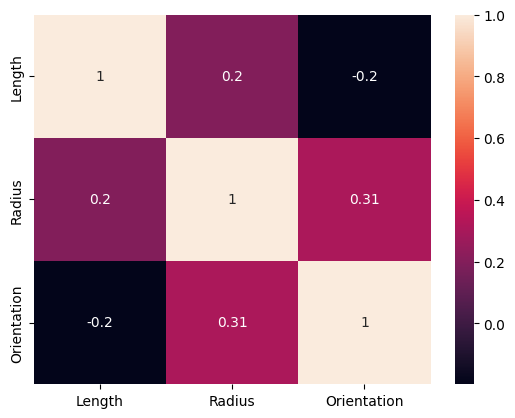

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot=True
)

In [22]:
df.describe()

,Length,Radius,Orientation
count,15.000000,15.000000,15.000000
mean,1.825921,0.717324,1.412910
std,0.554635,0.146984,0.832850
min,1.065049,0.507011,0.211138
25%,1.350716,0.587389,0.726061
50%,1.666084,0.698898,1.476013
75%,2.231403,0.830287,1.976528
max,2.665882,0.959527,2.941457
